# 🛒 Walmart Weekly Sales Forecasting Project

This project focuses on **forecasting weekly sales across Walmart stores and departments** using historical data that includes promotions, holidays, weather, and economic indicators.  
The goal is to identify the key factors influencing weekly sales and to build a model that can **accurately predict future sales** for better inventory, staffing, and promotion planning.

## 🎯 Project Objectives
- **Data Integration:** Combine multiple data sources — features, stores, and sales — into a single analytical dataset.
- **Feature Engineering:** Create meaningful features such as seasonal indicators, lag variables (`Weekly_Sales_Lag`), and dummy variables for departments, store types, and weeks.
- **Modeling:** Use regression-based approaches (OLS and reduced OLS) to understand how promotions, holidays, and seasonal patterns affect sales.
- **Evaluation:** Compare models using metrics like AIC/BIC, RMSE, and MAE to find the simplest model that still explains most of the variation in weekly sales.
- **Insights:** Identify top-performing departments (e.g., Dept 38, 92, 95) and understand their sales behavior relative to promotions and holidays.

## 🧠 What This Notebook Does
1. **Data Preprocessing:** Load, merge, and clean the Walmart sales, features, and stores datasets.  
2. **Feature Engineering:** Generate dummy variables for categorical columns (store type, department, season, etc.) and lag-based sales features.  
3. **Exploratory Analysis & Visualizations:** Study trends, correlations, and outliers across departments and weeks.  
4. **Model Building:** Fit baseline and extended OLS regression models (`result_withoutpromotion`, `result_with_dpt`, etc.) to predict weekly sales.  
5. **Reduced Models & Comparison:** Drop non-significant predictors (e.g., redundant dummies) to simplify the model while monitoring performance loss.  
6. **Performance Evaluation:** Compute metrics like RMSE, MAE, AIC/BIC, and accuracy for both training and testing sets.  
7. **Scalability & Profiling:** Evaluate computational performance and memory usage for potential deployment.

## ⚙️ Tools & Libraries Used
- **Python** (for all computations and visualizations)  
- **pandas / NumPy:** Data manipulation and feature generation  
- **statsmodels:** Regression modeling and statistical inference  
- **scikit-learn:** Model evaluation and error metrics  
- **matplotlib / seaborn:** Visualizations and insights  
- **AWS (optional future integration):** For deployment or model hosting once finalized

> **Purpose:**  
> This notebook serves as both an **analytical exploration** and a **predictive modeling pipeline** to support Walmart’s decision-making around sales forecasting, promotion planning, and inventory management.


## Importing all the required libraries

In [ ]:
import pandas as pd
import datetime                                        # To handle dates
import calendar                                        # To get month
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics                      # To get regression metrics
import scipy as sp
import time                                            # To do time complexity analysis
import random
import copy
import profile
import cProfile
from sklearn.cluster import KMeans                     # perform clustering operation
%matplotlib inline

## Read all data

In [ ]:
#loading in raw data
features_df = pd.read_csv("/features.csv")
stores_df = pd.read_csv("/stores.csv")
train_df = pd.read_csv("/train.csv")

<font color = 'orange'>Let's see how the data looks like. </font>

In [ ]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [ ]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
# Creating a seasons dictionary to identify what the weather is in every month
seasons_dict = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}

In [ ]:
# Creating the master dataset
master_df = train_df.merge(stores_df, on='Store', how='left')
master_df = master_df.merge(features_df, on=['Store', 'Date'], how='left')

## Preliminary Analysis

In [ ]:
d = copy.deepcopy(master_df)

d1 = d["Weekly_Sales"]

print(d["Weekly_Sales"].describe())

print("Percentile less than 3% provides only negative value : ",d["Weekly_Sales"].quantile(0.003))

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64
Percentile less than 3% provides only negative value :  -0.56


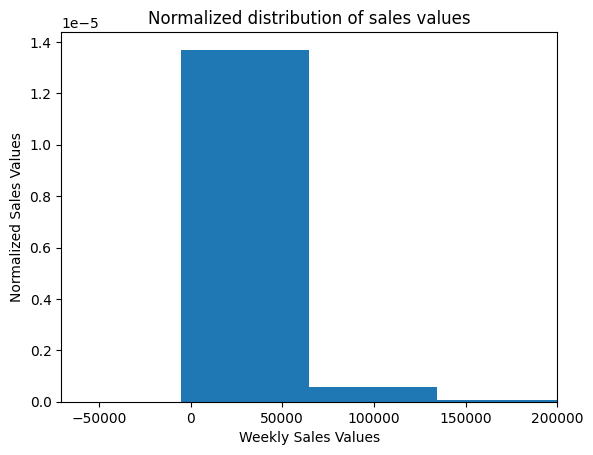

In [ ]:
x = np.concatenate((d1[d["Weekly_Sales"] < 0], d1[d["Weekly_Sales"] > 0]))

plt.hist(x, density=True)

plt.xlim([-70496, 200000])
plt.xlabel('Weekly Sales Values')
plt.ylabel('Normalized Sales Values')
plt.title('Normalized distribution of sales values')
plt.show()

<font color = '**Green**'>As we can see, there are some erroneous recordings of sales. The sales can not be negative for a particular month, as illustrated in the graph. In the later section we clean the data to remove negative sales</font>

## Data Cleaning Process


In [ ]:
# Filling empty markdown columns
master_df['MarkDown1'] = master_df['MarkDown1'].fillna(0)
master_df['MarkDown2'] = master_df['MarkDown2'].fillna(0)
master_df['MarkDown3'] = master_df['MarkDown3'].fillna(0)
master_df['MarkDown4'] = master_df['MarkDown4'].fillna(0)
master_df['MarkDown5'] = master_df['MarkDown5'].fillna(0)

# Cleaning holiday columns
master_df['isHoliday'] = master_df['IsHoliday_x']
master_df = master_df.drop(columns=['IsHoliday_x', 'IsHoliday_y'])

In [ ]:
# Handling Date and time
master_df['Date'] = pd.to_datetime(master_df['Date'], format='%Y-%m-%d')
master_df['Week_Number'] = master_df['Date'].dt.isocalendar().week
master_df['Quarter'] = master_df['Date'].dt.quarter
master_df['Month'] = master_df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
master_df['Season'] = (master_df['Date'].apply(lambda dt: (dt.month%12 + 3)//3)).map(seasons_dict)
master_df["Year"] = master_df["Date"].dt.year

## Creating Time based lagged variables

In [ ]:
master_df=master_df.sort_values(by=['Store', 'Dept', 'Year', 'Week_Number'], ascending=True)

# Previous week sales
shifted_sales = master_df.shift(1)
master_df_new_var = master_df.join(shifted_sales[['Store', 'Dept', 'Week_Number', 'Weekly_Sales', 'Year']], rsuffix='_Lag')
master_df_new_var.loc[(master_df_new_var.Dept != master_df_new_var.Dept_Lag) |  (master_df_new_var.Store != master_df_new_var.Store_Lag), 'Weekly_Sales_Lag'] = -2

# Previous month sales
#shifted_sales = master_df.shift(4)
#master_df_new_var = master_df_new_var.join(shifted_sales[['Store', 'Dept', 'Week_Number', 'Weekly_Sales', 'Year']], rsuffix='_Lag2')
#master_df_new_var['Monthly_Sales_Lag'] = master_df_new_var.Week_Number_Lag2
#master_df_new_var.loc[((master_df_new_var.Week_Number - master_df_new_var.Week_Number_Lag2) != 4) , 'Monthly_Sales_Lag'] = 0
#master_df_new_var[['Store', 'Dept', 'Week_Number', 'Weekly_Sales', 'Year', 'Weekly_Sales_Lag']]

# Average yearly sales
#my_df= master_df[['Store','Dept','Week_Number','Weekly_Sales']]
#my_df2= my_df.groupby(['Store','Dept','Week_Number']).mean()
#master_df.set_index(['Store','Dept','Week_Number'],inplace= True)
#df=master_df.join(my_df2, rsuffix='_yearly').reset_index(inplace=True)
#master_df_new_var['Yearly_Sales']=df['Weekly_Sales_yearly']

<font color = 'orange'>Lagged time varibles play a significant role in explaining current trends and seasonal pattern which repeat over a period of time. Furthermore lag variables capture the inherent store features which can get little tricky to zero out </font>

## Creating dummy variables for categorical values

In [ ]:
#forming categorical variables
categorical_cols = ['Quarter', 'Season', 'Store', 'Type', 'Week_Number', 'Dept'] # Added 'Dept' back to this list
# Ensure only columns present in master_df_new_var are used for get_dummies
cols_to_dummies = [col for col in categorical_cols if col in master_df_new_var.columns]
master_df_new_var = pd.get_dummies(master_df_new_var, columns=cols_to_dummies, prefix=cols_to_dummies)

In [ ]:
# Removing wrongly recorded data points
master_df_new_var = master_df_new_var.dropna()
#master_df_new_var = master_df_new_var.loc[master_df_new_var['Week_Number'] > 4]
#master_df_new_var = master_df_new_var.loc[master_df_new_var['Monthly_Sales_Lag'] > 0]
master_df_new_var = master_df_new_var.loc[master_df_new_var['Weekly_Sales_Lag'] > 0]
master_df_new_var = master_df_new_var.loc[master_df_new_var['Weekly_Sales'] > 0] #keeping points which are only positive in value for the sales

## Creating interaction variable

In [ ]:
master_df_new_var['MarkDown'] = master_df_new_var['MarkDown1'] + master_df_new_var['MarkDown2'] + master_df_new_var['MarkDown3'] + master_df_new_var['MarkDown4'] + master_df_new_var['MarkDown5']
master_df_new_var['MarkDown*Weekly_Sales_Lag'] = master_df_new_var['MarkDown']*master_df_new_var['Weekly_Sales_Lag']

<font color = 'orange'>We created an interaction variable as promotional offers (markdown) and weekly sales go hand in hand. They together explain the future weekly sales in a very robust fashion</font>

# Model Building

## Dividing the dataset into test and train dataset

<font color = 'orange'>We will do an out of time validation. The model will be trained on first two years data and tested on the last six months data.</font>

In [ ]:
#segregating the data
data_test = master_df_new_var[master_df_new_var.Year == 2012]
data_train = master_df_new_var[master_df_new_var.Year != 2012]

## Building full model linear regression

In [ ]:
features = list(master_df_new_var)
for x in (
    'Quarter','Month','Season','Year','Store','Dept',
    'Date','Type','Weekly_Sales','Weekly_Sales_Lag'
):
    if x in features:   # only remove if present
        features.remove(x)


In [ ]:
# Writing the formula
equals_to_str = ""
for i in features:
    equals_to_str = equals_to_str + str(i) + " + "

equals_to_str = str('Weekly_Sales ~ ') + equals_to_str
equals_to_str = equals_to_str[:-3]
equals_to_str_promotion = equals_to_str + "Markdown1"

In [ ]:
result_fullmodel = sm.ols(formula=equals_to_str, data = data_train).fit()
print("Model 1 without Promotion \n",result_fullmodel.summary())

Model 1 without Promotion 
                             OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.301e+04
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        00:45:26   Log-Likelihood:            -2.9899e+06
No. Observations:              289299   AIC:                         5.980e+06
Df Residuals:                  289109   BIC:                         5.982e+06
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

## Exploratory Analysis and descriptive statistics

<font color = 'orange'>In this step we are trying to analyze which particular departments contribute to higher sales and thus would play a pivotal role in predicting the sales in future weeks</font>

In [ ]:
# === Full model + t-stats vs mean weekly sales (robust to Dept or Dept_* dummies) ===
import re
import numpy as np
import matplotlib.pyplot as plt

df = data_train.copy()

# Base terms that really exist in df
holiday_col = 'IsHoliday' if 'IsHoliday' in df.columns else ('isHoliday' if 'isHoliday' in df.columns else None)
base_candidates = ['Weekly_Sales_Lag', 'Temperature', 'Type_A', 'Type_B', 'Type_C']
if holiday_col:
    base_candidates.append(holiday_col)
base_terms = [c for c in base_candidates if c in df.columns]

# Week dummies if present
week_cols = sorted([c for c in df.columns if c.startswith('Week_Number_') and not c.endswith('_Lag')])

# Dept: prefer raw C(Dept) if available; else fall back to Dept_* columns
use_c_dept = 'Dept' in df.columns
dept_cols = sorted([c for c in df.columns if c.startswith('Dept_') and not c.endswith('_Lag')])

# Build formula
rhs_terms = base_terms + week_cols
if use_c_dept:
    rhs_terms.append('C(Dept)')
else:
    rhs_terms += dept_cols

if not rhs_terms:
    raise ValueError("No regressors found for the model. Check that expected columns exist in data_train.")

equals_to_str_dept = "Weekly_Sales ~ " + " + ".join(rhs_terms)

# Fit
result_with_dpt = sm.ols(formula=equals_to_str_dept, data=df).fit()

# --- Extract department t-stats from the fitted model ---
tvals = result_with_dpt.tvalues

dept_term_to_num = {}
for term in tvals.index:
    # Match Dept_### (dummy style)
    m1 = re.match(r'^Dept_(\d+)$', term)
    if m1:
        dept_term_to_num[term] = int(m1.group(1))
        continue
    # Match C(Dept)[T.###] (patsy categorical style)
    m2 = re.match(r'^C\(Dept\)\[T\.(\d+)\]$', term)
    if m2:
        dept_term_to_num[term] = int(m2.group(1))

# Build (t, mean) pairs
pairs = []
labels = []
for term, dno in dept_term_to_num.items():
    t = float(tvals[term])

    # mean sales for this department
    if use_c_dept:
        # raw Dept column is present
        if (df['Dept'] == dno).any():
            m = float(df.loc[df['Dept'] == dno, 'Weekly_Sales'].mean())
        else:
            continue  # no rows for this dept in df
    else:
        # using one-hot: require the dummy column
        col = f'Dept_{dno}'
        if col in df.columns and df[col].sum() > 0:
            m = float(df.loc[df[col] == 1, 'Weekly_Sales'].mean())
        else:
            continue

    if np.isfinite(t) and np.isfinite(m):
        pairs.append((t, m))
        labels.append(f"Dept-{dno}" if dno in (38, 92, 95) else "")

# Plot
plt.figure()
if pairs:
    t_arr, m_arr = map(np.array, zip(*pairs))
    plt.scatter(t_arr, m_arr)
    plt.xlabel('T- statistics')
    plt.ylabel('Mean Weekly Sales')
    plt.title('Mean weekly sales by department type')
    for (t, m), lab in zip(pairs, labels):
        if lab:
            plt.annotate(lab, (t, m))
else:
    # Helpful diagnostics so you know what to fix in upstream data
    print("No plottable points. Diagnostics:")
    print(" - Using C(Dept):", use_c_dept)
    if use_c_dept and 'Dept' in df.columns:
        print(" - Distinct Dept values in data_train:", sorted(df['Dept'].unique())[:20])
    else:
        existing_dept_dummies = [c for c in dept_cols if c in df.columns]
        nonzero = [c for c in existing_dept_dummies if df[c].sum() > 0]
        print(" - Dept_* columns present:", len(existing_dept_dummies))
        print(" - Dept_* with nonzero rows:", len(nonzero))
plt.show()


No plottable points. Diagnostics:
 - Using C(Dept): False
 - Dept_* columns present: 81
 - Dept_* with nonzero rows: 81


<Figure size 640x480 with 0 Axes>

<font color = 'white'>The graph here illustrates  Department 38, 95 and 92 performing extra-ordinarily in terms of mean weekly sales. T-statistics are the values obtained by keeping all the departments as an independent variable in the full model and then observing the significance of these varibles in getting to the response variable (future weekly sale)</font>

<font color = 'orange'>We have found out the next set of important variables. They include size, markdown and yearly lag.</font>

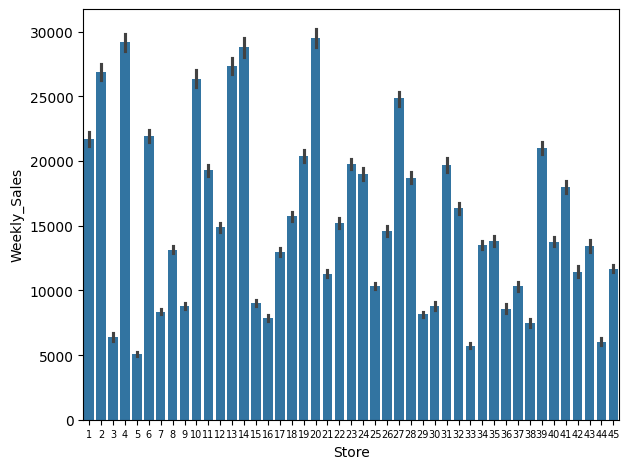

In [ ]:
# Create a temporary DataFrame with original Store and Weekly_Sales for plotting
plot_df = master_df[['Store', 'Weekly_Sales']].copy()

ax= sns.barplot(x="Store", y="Weekly_Sales",  data=plot_df)
# Get current tick locations and labels
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
# Set tick locations and labels explicitly
ax.set_xticks(ticks)
ax.set_xticklabels(labels, fontsize=7)
plt.tight_layout()
plt.show()

<font color = 'orange'>The above graph shows the relative variation in average weekly sales for different stores in Walmart</font>

<Axes: xlabel='Year', ylabel='Weekly_Sales'>

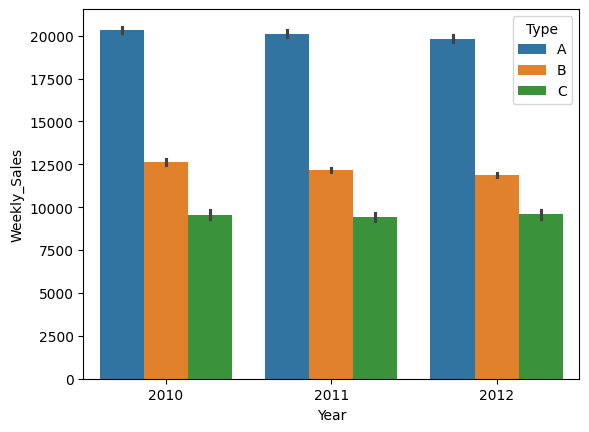

In [ ]:
sns.barplot(x="Year", y="Weekly_Sales", hue="Type", data=master_df)

<font color = 'orange'>In the above chart we can see the variation in the average sales of type A, type B, and type C stores. Type A store have the highest average sales.</font>

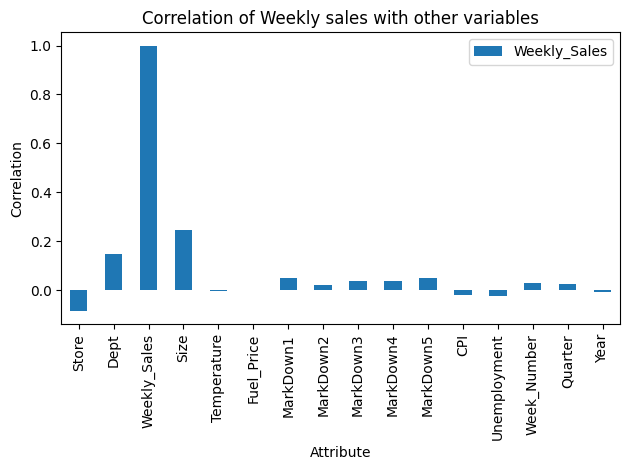

In [ ]:
df_corr = master_df.select_dtypes(include=np.number).corr()
ax=df_corr[['Weekly_Sales']].plot(kind='bar')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

<font color = 'orange'>From the above correlation matrix we can see that many factors in the original dataset had week correlation with weekly sales. Therefore, to better explain the weekly sales we have identified new variables like weekly lag and yearly lag which provides a robust time series trend analysis for the future sales.</font>

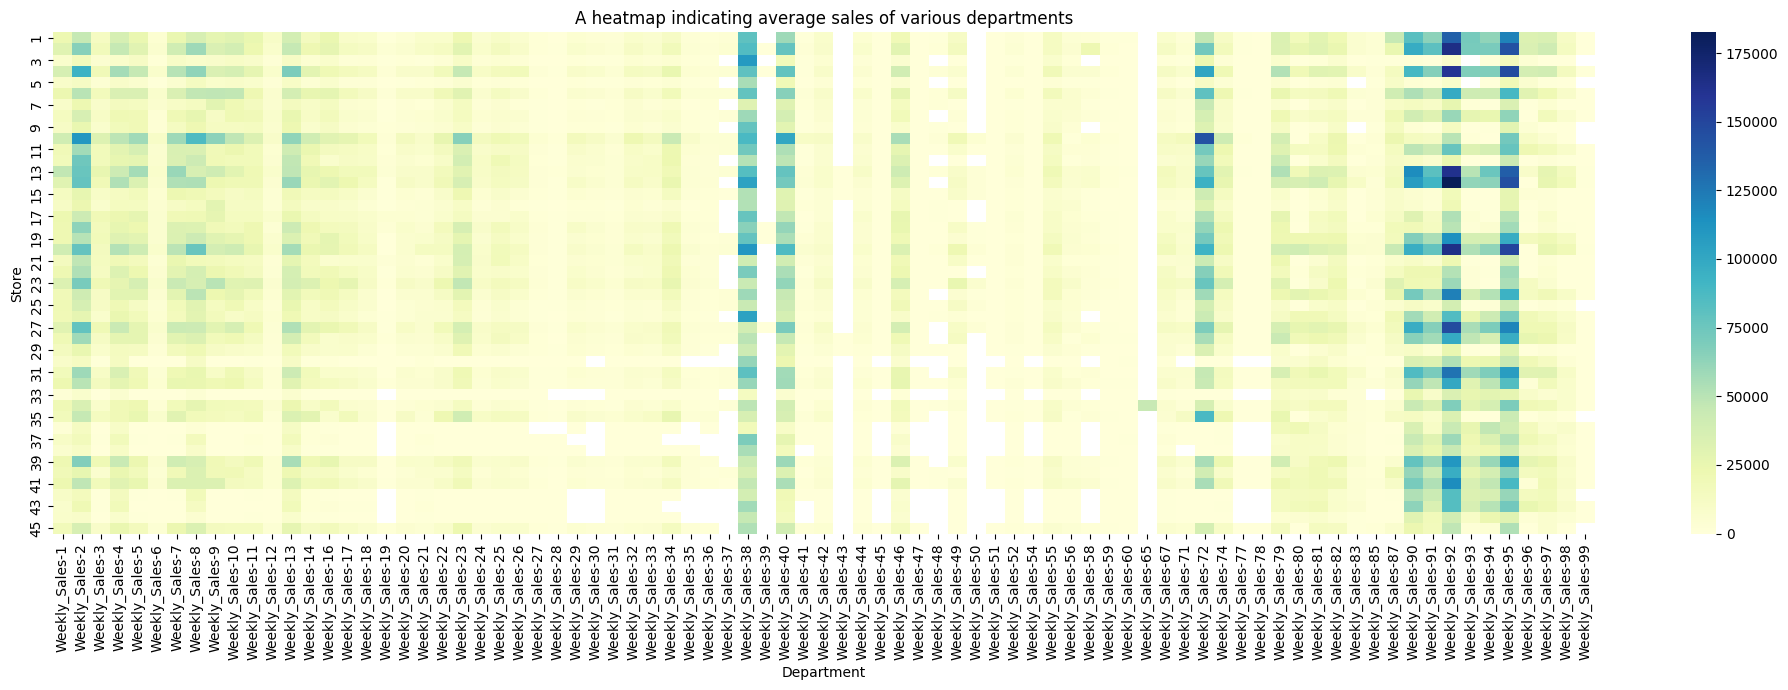

In [ ]:
heat_df= master_df[['Store','Dept','Weekly_Sales']]
heat_map=heat_df.groupby(['Store','Dept']).mean()
#heat_map.reset_index(inplace=True) # This line is no longer needed as unstack handles the pivot
heat_map=heat_map.unstack() # Use unstack for pivoting after groupby
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(heat_map, cmap="YlGnBu", ax=ax)
plt.xlabel('Department')
plt.ylabel('Store')
plt.title('A heatmap indicating average sales of various departments')
plt.tight_layout()
plt.show()

<font color ='green'>The above heatmap helped us in augmenting our decision of including critical departments like 92, 95, and 38 in our regression equation</font>

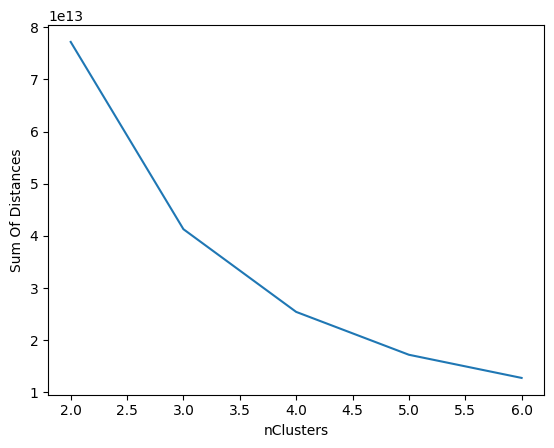

In [ ]:
#function to draw pair plot
def drawpairplot(total_clusters, data, blnDraw):
    kmeans=KMeans(n_clusters=total_clusters).fit(data)
    data['Cluster']=kmeans.labels_
    if blnDraw:
        sns.pairplot(data,hue='Cluster')

df = copy.deepcopy(master_df)   #creating a copy of the data frame to not change the master data frame
df["Type"] = df['Type'].map({'A': int(0), 'B': int(1), 'C': int(2)}) #giving numberical values to different store types

nClusters = range(2,7)  #defining a range of clusters between 2 and 7
rel_cols=['Type', 'Weekly_Sales'] #defining the relevant columns in the data set on which clustering needs to run

sumDistances=[]

#calculating SSE
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(df[rel_cols])
    sumDistances.append(kmeans.inertia_) #Proxy for SSE

# Plotting the elbow graph
plt.plot(nClusters,sumDistances,'-')
plt.xlabel('nClusters')
plt.ylabel('Sum Of Distances')
plt.show()


Now we will evaluate the model without promotion.

As we see a slight kink at cluster = 3. Assuming cluster as 3 and plotting the pair plot


/tmp/ipython-input-537425636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster']=kmeans.labels_


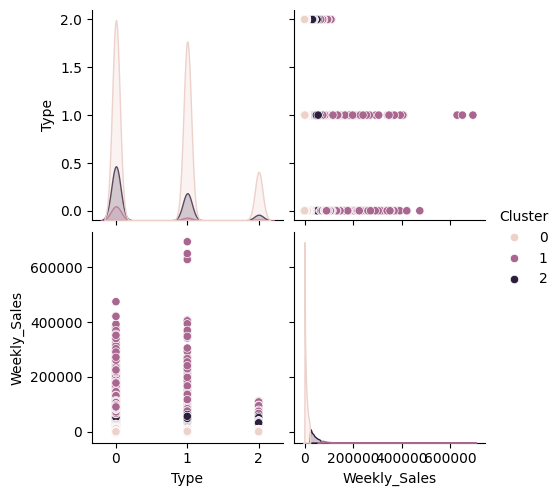

In [ ]:
print("As we see a slight kink at cluster = 3. Assuming cluster as 3 and plotting the pair plot")
drawpairplot(3,df[rel_cols],True) #drawing pair plot for 3 clusters

<font color = 'green'>Hence we can see that 3rd cluster which corresponds to "Type A" stores, have the most weekly sales and may be the largest store type amongst the other two stores. The classification of the masked data in the "Type" column of the dataset might indicate the size of the store. </font>

## Variable Shortlisting based on above analysis

In [ ]:
features = ['isHoliday', 'Temperature', 'Weekly_Sales_Lag']#, 'Size', 'MarkDown5', 'master_df_new_var']
features.extend(master_df_new_var.columns[master_df_new_var.columns.str.startswith('Type')])
#features.remove('Type') # This line is incorrect as 'Type' is not in the list

In [ ]:
equals_to_str = ""

for i in features:
    equals_to_str = equals_to_str + str(i) + " + "

equals_to_str = str('Weekly_Sales ~ ') + equals_to_str
equals_to_str = equals_to_str  + 'Week_Number_50 + Week_Number_51+ Dept_95 + Dept_92+ Dept_38'
equals_to_str_withpromotion = equals_to_str  + '+ MarkDown*Weekly_Sales_Lag'

## Reduced Models

In [ ]:
result_withoutpromotion = sm.ols(formula=equals_to_str, data = data_train).fit()
print("Model 1 without Promotion \n",result_withoutpromotion.summary())

Model 1 without Promotion 
                             OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 2.099e+05
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        00:22:40   Log-Likelihood:            -3.0104e+06
No. Observations:              289299   AIC:                         6.021e+06
Df Residuals:                  289288   BIC:                         6.021e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------


In [ ]:
result_withpromotion = sm.ols(formula=equals_to_str_withpromotion, data = data_train).fit()
print("Model 1 with Promotion \n",result_withpromotion.summary())

Model 1 with Promotion 
                             OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 1.822e+05
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        00:24:05   Log-Likelihood:            -3.0052e+06
No. Observations:              289299   AIC:                         6.010e+06
Df Residuals:                  289286   BIC:                         6.010e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
data_test = pd.concat([data_test, result_withoutpromotion.predict(data_test).rename("predicted_values_withoutpromotion")], axis=1)
print('The accuracy of the model is', round((1-(metrics.median_absolute_error(data_test.predicted_values_withoutpromotion, data_test.Weekly_Sales)/data_test.Weekly_Sales.median()))*100, 2), '%.(in the test dataset)')
data_train = pd.concat([data_train, result_withoutpromotion.predict(data_train).rename("predicted_values_withoutpromotion")], axis=1)
print('The accuracy of the model is', round((1-(metrics.median_absolute_error(data_train.predicted_values_withoutpromotion, data_train.Weekly_Sales)/data_train.Weekly_Sales.median()))*100, 2), '%.(in the train dataset)')

# import numpy as np  # add once if not already imported

# # TEST
# data_test["predicted_values_withoutpromotion"] = np.asarray(result_withoutpromotion.predict(data_test)).ravel()
# print(
#     'The accuracy of the model is',
#     round(
#         (1 - metrics.median_absolute_error(
#             data_test["predicted_values_withoutpromotion"],
#             data_test.loc[:, "Weekly_Sales"].squeeze()   # robust even if dup columns
#         ) / np.median(np.abs(data_test.loc[:, "Weekly_Sales"].squeeze()))
#         ) * 100, 2
#     ),
#     '%.(in the test dataset)'
# )

# # TRAIN
# data_train["predicted_values_withoutpromotion"] = np.asarray(result_withoutpromotion.predict(data_train)).ravel()
# print(
#     'The accuracy of the model is',
#     round(
#         (1 - metrics.median_absolute_error(
#             data_train["predicted_values_withoutpromotion"],
#             data_train.loc[:, "Weekly_Sales"].squeeze()
#         ) / np.median(np.abs(data_train.loc[:, "Weekly_Sales"].squeeze()))
#         ) * 100, 2
#     ),
#     '%.(in the train dataset)'
# )



The accuracy of the model is 84.56 %.(in the test dataset)
The accuracy of the model is 84.53 %.(in the train dataset)


## Result Plots

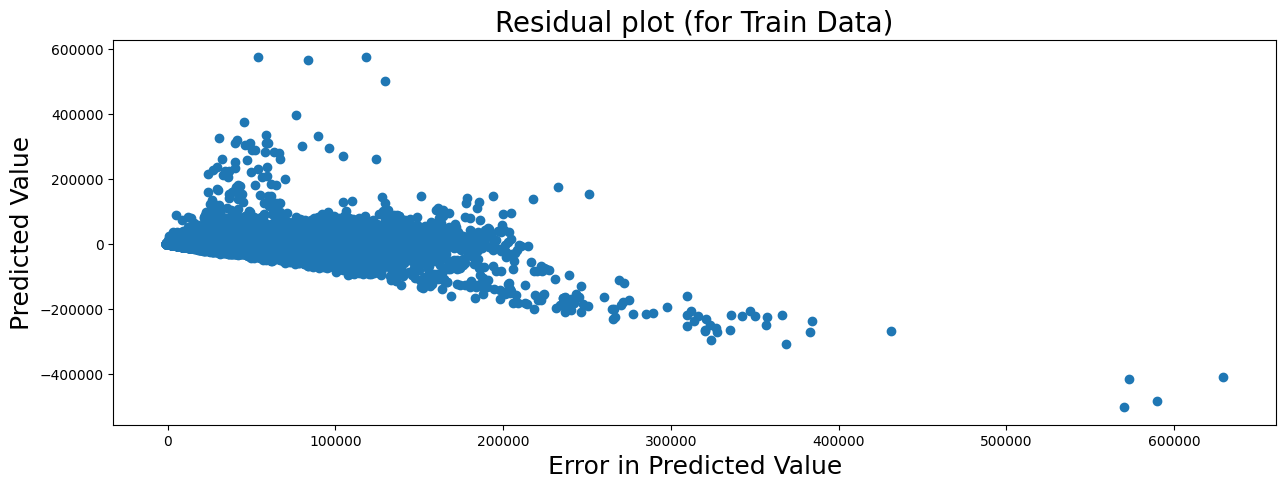

In [ ]:
pred_val = result_withoutpromotion.fittedvalues.copy()
true_val = data_train['Weekly_Sales'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(15,5))
plt.xlabel('Error in Predicted Value', fontsize = 18)
plt.ylabel('Predicted Value', fontsize = 18)
plt.title("Residual plot (for Train Data)", fontsize = 20)
_ = ax.scatter(pred_val, residual)

From the above residual plot for the train data we can see that the errors are farely random and we do not see any clear pattern among the residuals. Therefore, we can say that our linear regression does not have any heteroscedasticity

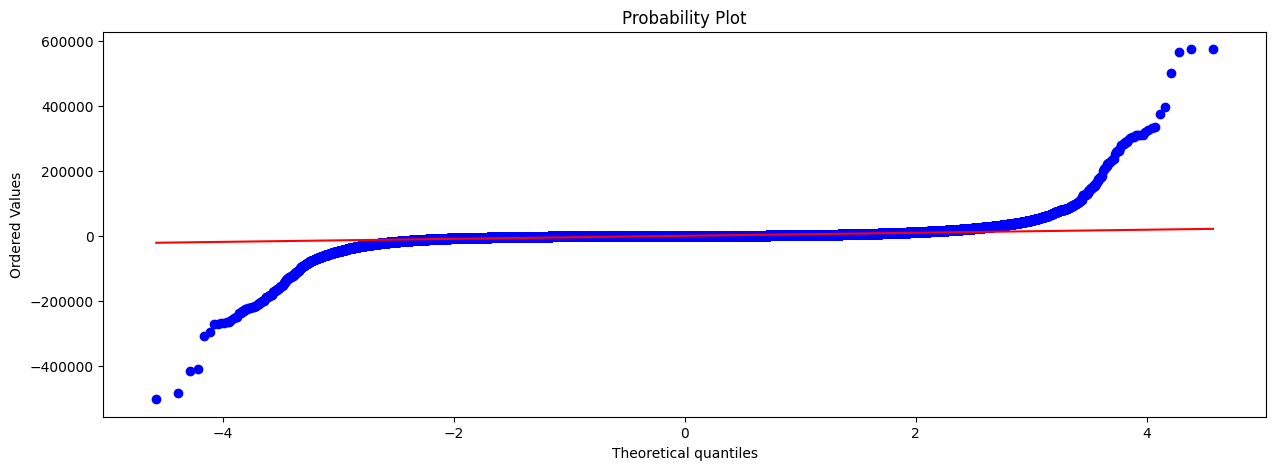

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
#r**2

The above probability plot indicates that the residuals are normally distributed.

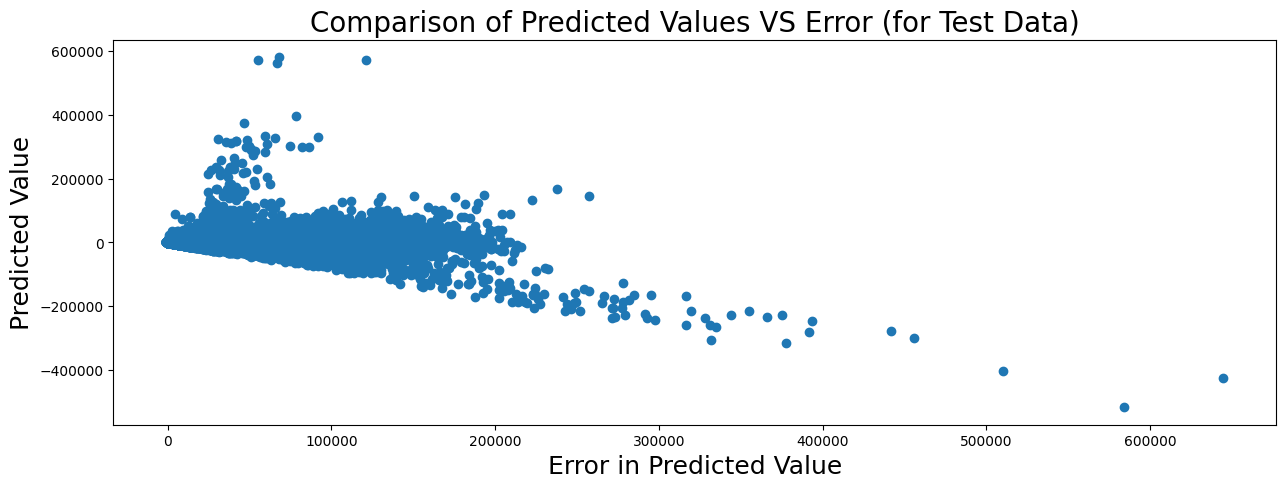

In [ ]:
pred_val = result_withpromotion.fittedvalues.copy()
true_val = data_train['Weekly_Sales'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(15,5))
plt.xlabel('Error in Predicted Value', fontsize = 18)
plt.ylabel('Predicted Value', fontsize = 18)
plt.title("Comparison of Predicted Values VS Error (for Test Data)", fontsize = 20)
_ = ax.scatter(pred_val, residual)

From the above residual plot for the test data we can see that the errors are fairly random and we do not see any clear pattern among the residuals. Therefore, we can say that our linear regression does not have any heteroscedasticity

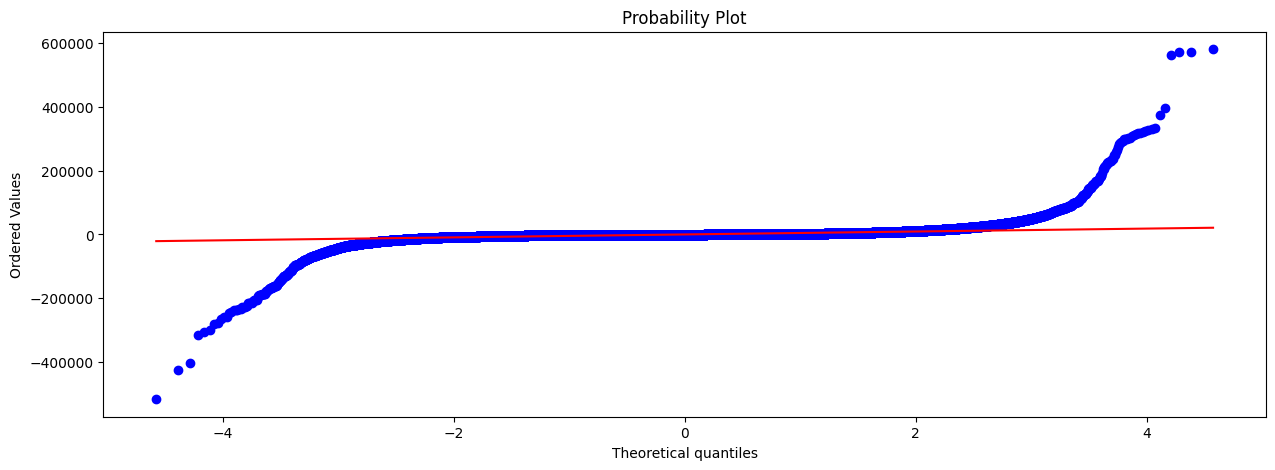

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
#r**2

The above probability plot indicates that the residuals are normally distributed

## Model Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate Model without Promotion
mae_train_nopromo = mean_absolute_error(data_train['Weekly_Sales'], data_train['predicted_values_withoutpromotion'])
mse_train_nopromo = mean_squared_error(data_train['Weekly_Sales'], data_train['predicted_values_withoutpromotion'])
rmse_train_nopromo = np.sqrt(mse_train_nopromo)

mae_test_nopromo = mean_absolute_error(data_test['Weekly_Sales'], data_test['predicted_values_withoutpromotion'])
mse_test_nopromo = mean_squared_error(data_test['Weekly_Sales'], data_test['predicted_values_withoutpromotion'])
rmse_test_nopromo = np.sqrt(mse_test_nopromo)

print("--- Model without Promotion ---")
print(f"Train MAE: {mae_train_nopromo:.2f}")
print(f"Train MSE: {mse_train_nopromo:.2f}")
print(f"Train RMSE: {rmse_train_nopromo:.2f}")
print(f"Test MAE: {mae_test_nopromo:.2f}")
print(f"Test MSE: {mse_test_nopromo:.2f}")
print(f"Test RMSE: {rmse_test_nopromo:.2f}")

# Evaluate Model with Promotion
data_test['predicted_values_withpromotion'] = result_withpromotion.predict(data_test) # Store predictions for model with promotion

mae_train_promo = mean_absolute_error(data_train['Weekly_Sales'], result_withpromotion.fittedvalues)
mse_train_promo = mean_squared_error(data_train['Weekly_Sales'], result_withpromotion.fittedvalues)
rmse_train_promo = np.sqrt(mse_train_promo)

mae_test_promo = mean_absolute_error(data_test['Weekly_Sales'], data_test['predicted_values_withpromotion'])
mse_test_promo = mean_squared_error(data_test['Weekly_Sales'], data_test['predicted_values_withpromotion'])
rmse_test_promo = np.sqrt(mse_test_promo)


print("\n--- Model with Promotion ---")
print(f"Train MAE: {mae_train_promo:.2f}")
print(f"Train MSE: {mse_train_promo:.2f}")
print(f"Train RMSE: {rmse_train_promo:.2f}")
print(f"Test MAE: {mae_test_promo:.2f}")
print(f"Test MSE: {mse_test_promo:.2f}")
print(f"Test RMSE: {rmse_test_promo:.2f}")

--- Model without Promotion ---
Train MAE: 2665.46
Train MSE: 63954049.85
Train RMSE: 7997.13
Test MAE: 2137.93
Test MSE: 17116025.27
Test RMSE: 4137.15

--- Model with Promotion ---
Train MAE: 2571.71
Train MSE: 61688031.75
Train RMSE: 7854.17
Test MAE: 2804.95
Test MSE: 25517697.16
Test RMSE: 5051.50


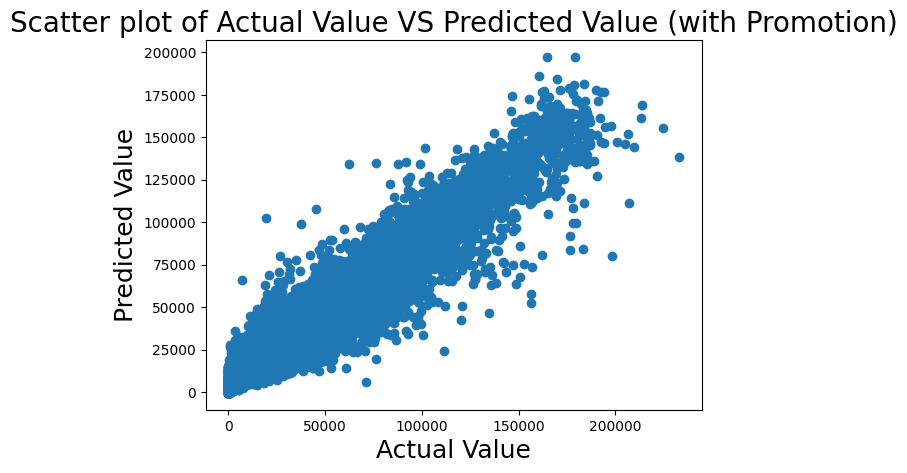

In [ ]:
plt.scatter(data_test['Weekly_Sales'], data_test['predicted_values_withpromotion'])
plt.xlabel('Actual Value', fontsize = 18)
plt.ylabel('Predicted Value', fontsize = 18)
plt.title("Scatter plot of Actual Value VS Predicted Value (with Promotion)", fontsize = 20)
plt.show()

# Scalability Analysis

## Modifying the regression for scalability purposes

In [ ]:
# To calculate L2 norm
def normDiff (x, y, ord=2):
    return np.linalg.norm (x - y, ord=ord) / np.linalg.norm (y, ord=ord) #Normalized by the "length" of y.

Please note that even though the batchwise regression is currently run on data points, the code to run it on a batch is mentioned in the commented portions.

In [ ]:
# Define batchwise regression
def run_ols_batchwise(DataFrame, Formula):
    df_length = len(DataFrame.index)

    # Getting an initial estimate for beta coefficients
    DataFrame.index = range(df_length)
    DataFrame['batch_number'] = DataFrame.index % int(df_length/10000)
    result = sm.ols(Formula, DataFrame.loc[DataFrame.batch_number == 1]).fit()

    # Extracting relevant columns out of formula
    variables = Formula.split('+')
    variable1 = variables[0].split('~')[1]
    variables.remove(variables[0])
    variables.insert(0, variable1)
    variables.insert(0, 'Constant')
    variables = [x.strip(' ') for x in variables]

    # Preparing the data for interative linear regression
    DataFrame['Constant'] = 1
    X = np.array(DataFrame[variables])
    y = np.array(DataFrame.Weekly_Sales)
    beta_t = np.array(result.params)
    phi = 2/max(result.eigenvals)

    for t in range(int(df_length)):

        #print("Iteration1:", beta_t)
        #y_data_array = DataFrame[(100*t):(100*(t + 1))]['Weekly_Sales']
        #x_data_array = DataFrame.loc[(100*t):(100*(t + 1))-1, variables]
        #yT = np.array(y_data_array)
        #xT = np.array(x_data_array)

        xT = X[t,:]
        yT = y[t]

        #print(xT.shape)
        #print(yT.shape)
        #print(beta_t.shape)

        #delta_t = phi * xT.T.dot(yT -xT.dot(beta_t))

        delta_t = phi * xT.dot(yT -xT.T.dot(beta_t))

        beta_t = beta_t + delta_t

    return beta_t

# Time complexity analysis

In [ ]:
# To measure the time taken to execute the function
def measureTime(fun,arg1):
    nTimes=10
    times=np.zeros(nTimes)
    for i in range(nTimes):
        startTime = time.time()
        fun(arg1)
        endTime = time.time()
        times[i]=endTime-startTime
    return np.mean(times)

In [ ]:
# We use the model to predict the expected sales
def predict(total_obs):
    X = []
    y = []
    # Get the list of columns required by the model, excluding the intercept
    model_features = [col for col in result_withoutpromotion.params.index if col != 'Intercept']
    # Ensure the columns exist in data_test before selecting
    available_features = [col for col in model_features if col in data_test.columns]

    for obs in range(total_obs):
        # Ensure random index is within the bounds of the DataFrame
        i = random.randint(0, len(data_test) - 1)
        # Select the entire row as a DataFrame
        x_row_df = data_test.iloc[[i]]

        # Ensure the columns expected by the model are present in the single-row DataFrame
        # This might involve adding dummy columns with 0 if they are not present in the selected row
        # For simplicity and to leverage patsy, we'll pass the whole row and let patsy handle it,
        # assuming the original data_test has all necessary columns (including dummies).

        X.append(x_row_df)
        # Pass the single-row DataFrame to the predict method
        predicted_value = result_withoutpromotion.predict(x_row_df)
        y.append(predicted_value.iloc[0]) # Extract the scalar value from the prediction result
    return (X, y)

In [ ]:
N = 11                                                   # Number of variables is set constant
M = np.geomspace(start=15,stop=1000,num=5,dtype=int)    # Varying the number of observations

times = np.zeros(len(M))
for (i, m) in enumerate(M):
    # Pass the number of observations to the predict function
    t = measureTime(predict, m)
    times[i] = t

# Print times and M for debugging if needed
# print("M:", M)
# print("Times:", times)

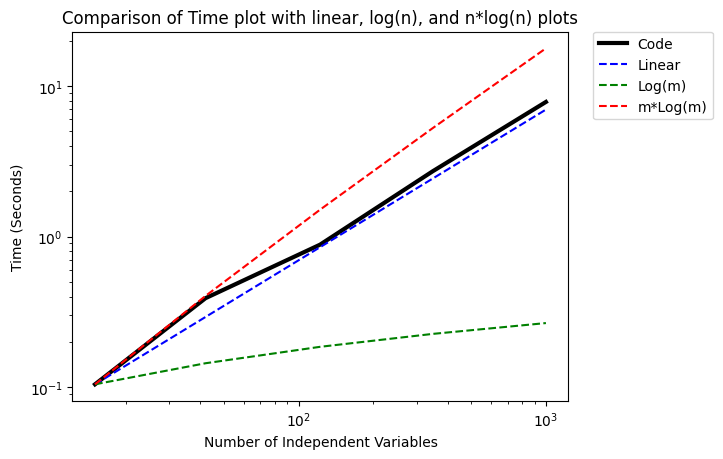

In [ ]:
# Creating Benchmarks
# Ensure times has positive values before calculating benchmarks
if np.any(times > 0):
    linearTime = [times[0]/M[0]*m for m in M]
    lognTime = [times[0]/(np.log(M[0]))*(np.log(m)) for m in M]
    nlognTime = [times[0]/(M[0]*np.log(M[0]))*(m*np.log(m)) for m in M] if M[0] > 1 else [0] * len(M) # Avoid log(0)
    loglognTime = [times[0]/(np.log(M[0])*np.log(M[0]))*(np.log(m)*np.log(m)) for m in M] if M[0] > 1 else [0] * len(M) # Avoid log(0)

    # Plotting the result
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.loglog (M, times, 'k-',linewidth=3,label="Code")

    ax1.loglog (M, linearTime, 'b--',label="Linear")
    ax1.loglog (M, lognTime, 'g--',label="Log(m)")
    if M[0] > 1: # Only plot if valid log(M[0])
      ax1.loglog (M, nlognTime, 'r--',label="m*Log(m)")

    plt.xlabel('Number of Independent Variables')
    plt.ylabel('Time (Seconds)')
    plt.title("Comparison of Time plot with linear, log(n), and n*log(n) plots")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
else:
    print("Cannot plot time complexity: Times array contains non-positive values.")

# Profiling

In [ ]:
import cProfile
profile.run('print(predict(20));print(\'=\' * 100)')

([             Date  Weekly_Sales   Size  Temperature  Fuel_Price  MarkDown1  \
156000 2012-03-30       8793.01  57197        48.29        3.75    3404.77   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5  ...  Dept_94  Dept_95  \
156000        0.0        5.0      188.8    1133.72  ...    False    False   

        Dept_96 Dept_97  Dept_98  Dept_99  MarkDown  \
156000    False   False    False    False   4732.29   

        MarkDown*Weekly_Sales_Lag  predicted_values_withoutpromotion  \
156000               3.837864e+07                        8088.051457   

        predicted_values_withpromotion  
156000                     8272.241566  

[1 rows x 211 columns],              Date  Weekly_Sales   Size  Temperature  Fuel_Price  MarkDown1  \
404577 2012-01-27      17545.12  41062         52.1        3.29     122.11   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5  ...  Dept_94  Dept_95  \
404577       8.64      26.26        0.0     532.33  ...    False    False   

        Dep

As can be seen, the majority of the fuction call is spent on fectching the getattribute and length functions both of which are library functions. So, it would seem that this code is optimized. If profiling showed another custom defined function to be consuming the largest memory, then we might want to redefine those particular ones.

In [ ]:
%timeit predict(10)

78.2 ms ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
cProfile.run('predict(10)')

         125717 function calls (122910 primitive calls) in 0.150 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      260    0.000    0.000    0.000    0.000 <frozen abc>:117(__instancecheck__)
       12    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
       95    0.000    0.000    0.001    0.000 <frozen importlib._bootstrap>:1390(_handle_fromlist)
       20    0.000    0.000    0.000    0.000 <string>:1(<lambda>)
      2/1    0.000    0.000    0.149    0.149 <string>:1(<module>)
     1211    0.001    0.000    0.001    0.000 __init__.py:34(using_copy_on_write)
      410    0.000    0.000    0.000    0.000 __init__.py:42(warn_copy_on_write)
       31    0.000    0.000    0.000    0.000 __init__.py:55(using_pyarrow_string_dtype)
       20    0.000    0.000    0.000    0.000 _asarray.py:27(require)
        1    0.000    0.000    0.000    0.000 _base.py:337(_invoke_callbacks)
        1    0.000    0.000

<font color = 'green'>Similar to profile, the majority of the time is spent on the length and assignment operations. Thus, these two function calling should be minimmized for increasing the efficiency.</font>